# Table of contents

1. Import libraries and the most recently updated data set.
2. Address any PII in this new data to consider any security implications that may exist.
3. Create a regional segmentation of the data.
4. Create an exclusion flag for low-activity customers and exclude them from the data set.
5. Define a variable for profiling.

   a. Define a demographic segmentation;
   
   b. Define a behavioural segmentation;
   
   
6. Create visualizationa to show the distribution of profiles.
7. Create a customer profile aggregation for usage frequency and expenditure.
8. Compare the different profiles with regions and departments.
9. Export dataset and visualizations.

# 1. Import libraries and the most recently updated data set

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining the path
path = r'C:\Users\franc\Documents\01-2023 Instacart Basket Analysis'

In [3]:
# Import the most up-to-date project data
df_final= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_combined.pkl'))

In [4]:
# Import the most up-to-date "departments" dataset
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

# 2. Address any PII in this new data to consider any security implications that may exist

In [5]:
# General checkings
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  busiest_days            object  
 16  busiest_day             object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  averag

In [6]:
# Reduce the memory usage to avoid memory issues
for column in df_final:
 if df_final[column].dtype == 'float64':
     df_final[column]=pd.to_numeric(df_final[column], downcast='float')
 if df_final[column].dtype == 'int64':
     df_final[column]=pd.to_numeric(df_final[column], downcast='integer')

In [7]:
# Change a variable to a suitable format
df_final['days_since_prior_order'] = df_final['days_since_prior_order'].astype('float16')

In [8]:
df_final['loyalty_flag'] = df_final['loyalty_flag'].astype('category')

In [9]:
df_final['frequency_order_flag'] = df_final['frequency_order_flag'].astype('category')

In [10]:
df_final['average_order_flag'] = df_final['average_order_flag'].astype('category')

In [11]:
# Check the result
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   new_customer            bool    
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  product_name            object  
 11  aisle_id                int16   
 12  department_id           int8    
 13  prices                  float32 
 14  _merge                  category
 15  busiest_days            object  
 16  busiest_day             object  
 17  busiest_hours           object  
 18  max_order               int8    
 19  loyalty_flag            category
 20  average_price           float32 
 21  averag

In [12]:
# Check the shape of data set
df_final.shape

(32404859, 31)

In [13]:
df_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,average_order_flag,median_prior_order,frequency_order_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,Low spender,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


The dataframe once had PII data (customer names and surnames), but those columns were removed in previous exercise because they were irrelevant to this project. Consequently, the data no longer contains sensitive information.

# 3.Create a regional segmentation of the data

In [14]:
df_final['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [15]:
# Defining different regions
region_one_northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [16]:
region_two_midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [17]:
region_three_south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [18]:
region_four_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [19]:
# Creating a new 'region' column
df_final.loc[df_final['state'].isin(region_one_northeast), 'region'] = 'Northeast'

In [20]:
df_final.loc[df_final['state'].isin(region_two_midwest), 'region'] = 'Midwest'

In [21]:
df_final.loc[df_final['state'].isin(region_three_south), 'region'] = 'South'

In [22]:
df_final.loc[df_final['state'].isin(region_four_west), 'region'] = 'West'

In [23]:
# Checking the results
df_final['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [24]:
df_final.shape

(32404859, 32)

In [25]:
df_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,median_prior_order,frequency_order_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,18.457626,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [26]:
# Determine whether there’s a difference in spending habits between the different U.S. regions
crosstab_spending = pd.crosstab(df_final['region'], df_final['average_order_flag'], dropna = False)

In [27]:
crosstab_spending

average_order_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# 4. Create an exclusion flag for low-activity customers and exclude them from the data set.

In [28]:
# Create an exclusion flag for low-activity customers 
df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'low-activity'

In [29]:
df_final.loc[df_final['max_order'] >= 5, 'exclusion_flag'] = 'high-activity'

In [30]:
# Checking the results
df_final['exclusion_flag'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: exclusion_flag, dtype: int64

In [31]:
df_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_order_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,473747,1,3,3,12,21.0,False,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,431534,1,5,4,15,28.0,False,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [32]:
# Creating a new dataframe without the low-activity customers
df_final2= df_final.loc[df_final['exclusion_flag'] == 'high-activity']

In [33]:
#exporting the new dataframe
df_final2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all.pkl'))

# 5. Define a variable for profiling

5.1 Define a demographic segmentation;

In [34]:
# Importing the most recent dataframe
df_all = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_all.pkl'))

In [35]:
# Create a profiling variable based on age
df_all['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

According to our describe() function, the youngest Instacart clients are 18 and the oldest are 81.
Age categories will be classified as follows:

1) Young adults 18 - 25

2) Adults 26 - 45

3) Middle Aged 45 - 64

4) Seniors 65+

In [36]:
# Create a new 'age' column
df_all.loc[(df_all['age'] > 18) & (df_all['age'] <25), 'age_flag'] = 'Young adult'

In [37]:
df_all.loc[(df_all['age'] >= 25) & (df_all['age'] <45), 'age_flag'] = 'Adult'

In [38]:
df_all.loc[(df_all['age'] >= 45) & (df_all['age'] < 65), 'age_flag'] = 'Middle aged'

In [39]:
df_all.loc[df_all['age'] >= 65, 'age_flag'] = 'Senior'

In [40]:
# Check the results
df_all['age_flag'].value_counts(dropna = False)

Middle aged    9690051
Adult          9663775
Senior         8195544
Young adult    2936737
NaN             478457
Name: age_flag, dtype: int64

In [41]:
# Create a profiling variable based on income
df_all['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

According to our describe() function, the lowest income for Instacart clients is 25.9K $ while the highest is 593.9K. Salary categories will be classified as follows:

1) Low income: < 65K

2) Lower Middle income: between 65 - 100K 

3) Upper Middle income: between 100 - 150 k

4) High income: 150k +

Text(0.5, 1.0, 'IC customers income distribution')

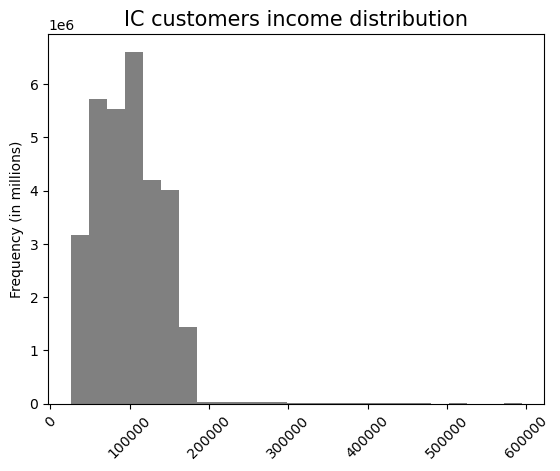

In [42]:
# Create a income histogram 
hist_income =df_all['income'].plot.hist(bins = 25,rot = 45, color = 'gray')
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC customers income distribution", fontsize = '15')

In [43]:
# Export the histogram
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_income.png'))

In [44]:
# Creating a new 'age' column
df_all.loc[df_all['income'] < 65000, 'income_flag'] = 'Low income'

In [45]:
df_all.loc[(df_all['income'] >= 65000) & (df_all['income'] < 100000), 'income_flag'] = 'Lower Middle income'

In [46]:
df_all.loc[(df_all['income'] >= 100000) & (df_all['income'] < 150000), 'income_flag'] = 'Upper Middle income'

In [47]:
df_all.loc[df_all['income'] >= 150000, 'income_flag'] = 'High income'

In [48]:
# Checking the results
df_all['income_flag'].value_counts(dropna = False)

Upper Middle income    10312127
Lower Middle income     9649823
Low income              7107339
High income             3895275
Name: income_flag, dtype: int64

In [49]:
# Create a profiling variable based on number of dependants
df_all['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

According to our describe() function, IC clients have between 0-3 kids.

Families will be classified as follows:

1) Single = 0 kids

2) Small family = 1-2 kids

3) Big family = 3+ kids

In [50]:
# Create the loop
family_result = []

In [51]:
for value in df_all["n_dependants"]:
  if (value >= 1 and value <= 2):
    family_result.append("Small family")
  elif (value >= 3):
    family_result.append("Big family")
  else:
    family_result.append("No kids")

In [52]:
# Create a new "family"column
df_all['family_flag'] = family_result

In [53]:
# Checking the results
df_all['family_flag'].value_counts(dropna = False)

Small family    15452367
Big family       7772516
No kids          7739681
Name: family_flag, dtype: int64

5b. Define a behavioural segmentation

In [54]:
# Analyzing the df_depts dataframe to identify certain goods IC customers
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [55]:
# Dropping columns not useful for our analysis
df_depts = df_depts.drop(columns = ['Unnamed: 0'])

In [56]:
# Check the results
df_depts.shape

(21, 1)

In [57]:
# Check "order_hour_of_day column"
df_all['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [58]:
# Create a loop
hourly_result = []

In [59]:
for value in df_all["order_hour_of_day"]:
  if (value >= 10 and value <= 21):
    hourly_result.append("Regular customer")
  elif (value >= 6 and value <= 10):
    hourly_result.append("Early bird")
  else:
    hourly_result.append("Night owl")

In [60]:
# Create a profiling variable based on when customers order
df_all['order_time'] = hourly_result

In [61]:
# Create a profile for young adult with a low income
df_all.loc[(df_all['age']<= 25) & (df_all['income'] <= 30000), 'profile'] = 'low-income young adult'

In [62]:
# Create a profile for single adults with a good income
df_all.loc[(df_all['family_flag'] == 'No kids') & (df_all['income'] >= 100000) , 'profile'] = 'wealthy single adult'

In [63]:
# Create a profile for married couples without kids
df_all.loc[(df_all['family_flag'] == 'No kids') & (df_all['marital_status'] == 'married'), 'profile'] = 'family without kids'

In [64]:
# Create a profile for low income families
df_all.loc[(df_all['n_dependants'] >= 1) & (df_all['income'] < 65000), 'profile'] = 'low-income family'

In [65]:
# Create a profile for lower middle income families
df_all.loc[(df_all['n_dependants'] >= 1) & (df_all['income'] >= 65000) & (df_all['income'] < 100000), 'profile'] = 'lower-middle-income family'

In [66]:
# Create a profile for upper middle income families
df_all.loc[(df_all['n_dependants'] >= 1) & (df_all['income'] >= 100000) & (df_all['income'] < 150000), 'profile'] = 'upper-middle-income family'

In [67]:
# Create a profile for wealthy families
df_all.loc[(df_all['n_dependants'] >= 1) & (df_all['income'] >= 150000), 'profile'] = 'wealthy family'

In [68]:
# Create a profile for low-income retired
df_all.loc[(df_all['income'] <65000) & (df_all['age'] > 65),'profile'] ='low-income retired'

In [69]:
# Creating a profile for wealthy retired
df_all.loc[(df_all['income'] >=65000) & (df_all['age'] > 65),'profile'] ='wealthy retired'

In [70]:
# Create a profile for alcohol drinkers
df_all.loc[df_all['department_id'] ==5, 'profile'] = 'alcohol consumer'

In [71]:
# Create a profile for meat and seafood eaters (non vegetarian)
df_all.loc[df_all['department_id'] ==12, 'profile'] = 'non-vegetarian'

In [72]:
# Create a profile for pet owners
df_all.loc[df_all['department_id'] ==8, 'profile'] = 'pet owner'

In [73]:
# Fill NaN as "other profiles"
df_all['profile'] = df_all['profile'].fillna('other_profiles')

In [74]:
# Check the results
df_all['profile'].value_counts(dropna = False)

wealthy retired               6574693
lower-middle-income family    6035605
upper-middle-income family    4600328
low-income family             4497596
other_profiles                3488015
wealthy single adult          2161139
wealthy family                1752561
low-income retired             926926
non-vegetarian                 674781
alcohol consumer               144627
pet owner                       93060
low-income young adult          15233
Name: profile, dtype: int64

In [75]:
# Confirme the added column
df_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,n_dependants,marital_status,income,region,exclusion_flag,age_flag,income_flag,family_flag,order_time,profile
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,3,married,40423,South,high-activity,Adult,Low income,Big family,Early bird,low-income family
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,high-activity,Adult,Low income,Big family,Early bird,low-income family
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,high-activity,Adult,Low income,Big family,Regular customer,low-income family
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,high-activity,Adult,Low income,Big family,Early bird,low-income family
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,high-activity,Adult,Low income,Big family,Regular customer,low-income family


# 6. Create visualizations to show the distribution of profiles

Text(0.5, 1.0, 'IC customers profiles')

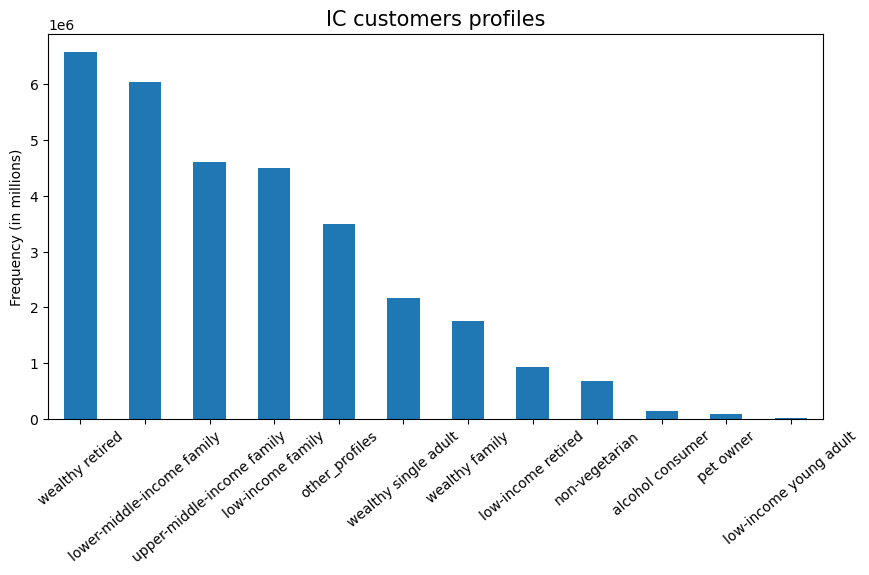

In [76]:
# Create a barchart with the profiles
barchart_profiles = df_all['profile'].value_counts().plot.bar(rot=40, figsize = (10,5))
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC customers profiles", fontsize = '15')

Text(0.5, 1.0, 'IC customers order time')

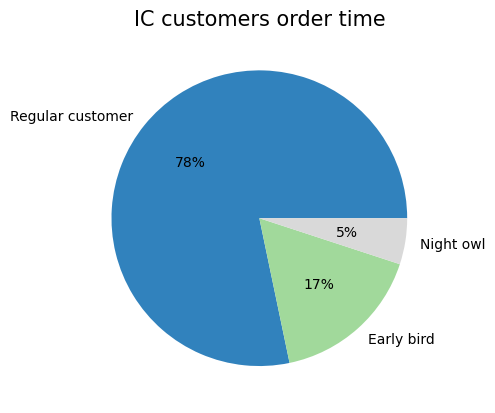

In [77]:
# Create a pie chart of 'order_time' column
time_habit_pie = df_all['order_time'].value_counts().plot.pie(labels = ['Regular customer','Early bird','Night owl'], autopct=('%1.f%%'), colormap='tab20c',label='')
plt.title( "IC customers order time", fontsize= '15')

Text(0.5, 1.0, 'IC customers family composition')

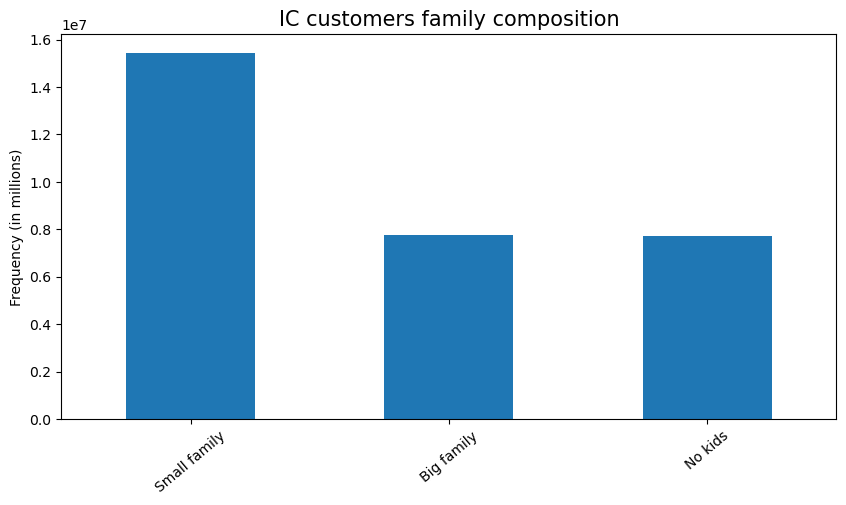

In [78]:
# Create a bar chart that shows IC customers family composition
barchart_family = df_all['family_flag'].value_counts().plot.bar(rot=40, figsize = (10,5))
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC customers family composition", fontsize = '15')

Text(0.5, 1.0, 'IC customers order time habits')

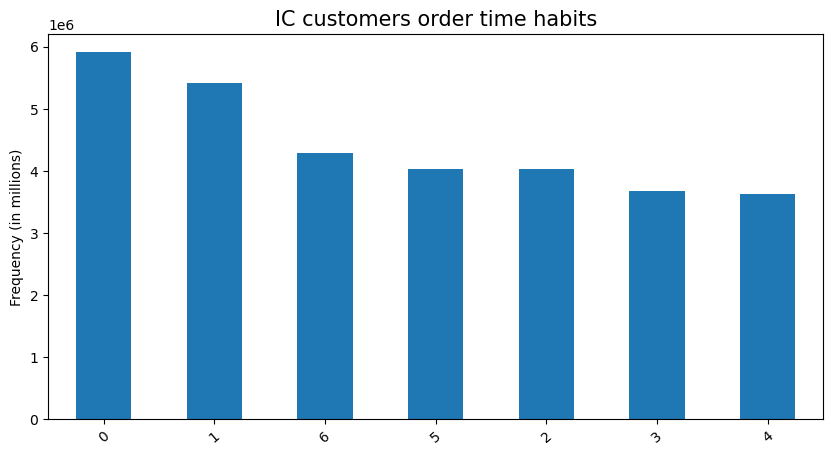

In [81]:
# Create a bar chart to show the result
order_per_day_chart = df_all['orders_day_of_week'].value_counts().plot.bar(rot=40, figsize = (10,5))
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC customers order time habits", fontsize = '15')

In [82]:
# Save the visualizations
barchart_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'all_profiles.png'))

In [83]:
time_habit_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_time.png'))

In [84]:
barchart_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'all_profiles.png'))

In [85]:
order_per_day_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week.png'))

# 7. Create a customer profile aggregation for usage frequency and expenditure.

In [84]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_all.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                 days_since_prior_order  \
                                max  min       mean                   mean   
profile                                                                      
alcohol consumer               15.0  1.0   8.150699               9.265625   
low-income family           14900.0  1.0   7.192355              10.304688   
low-income retired             20.0  1.0   6.547977              10.421875   
low-income young adult         15.0  1.0   6.434320              10.640625   
lower-middle-income family  99999.0  1.0   8.585118              10.093750   
non-vegetarian                 25.0  8.0  16.300034              10.453125   
other_profiles              99999.0  1.0  12.073483              10.156250   
pet owner                      15.0  1.0   7.887489              10.882812   
upper-middle-income family  99999.0  1.0  10.501241              10.218750   
wealthy family              99999.0  1.0  38.596996              10.078125   
wealthy retired             99999.0  1.0  12.489497              10.125000   

                                       
                            min   max  
profile                                
alcohol consumer           -1.0  30.0  
low-income family          -1.0  30.0  
low-income retired         -1.0  30.0  
low-income young adult     -1.0  30.0  
lower-middle-income family -1.0  30.0  
non-vegetarian             -1.0  30.0  
other_profiles             -1.0  30.0  
pet owner                  -1.0  30.0  
upper-middle-income family -1.0  30.0  
wealthy family             -1.0  30.0  
wealthy retired            -1.0  30.0

In [85]:
# Checking for outliers
df_all['prices'].describe()

count    3.096456e+07
mean     1.042338e+01
std      4.913244e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [86]:
df_all['prices'].max()

99999.0

In [87]:
# Fixing the issue with the outliers
df_all.loc[df_all['prices'] >100, 'prices'] = np.nan

In [88]:
df_all['prices'].max()

25.0

In [89]:
# Aggregate the max, mean, and min variables on a customer-profile level
df_all.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                 days_since_prior_order       \
                              max  min       mean                   mean  min   
profile                                                                         
alcohol consumer             15.0  1.0   8.150699               9.265625 -1.0   
low-income family            20.0  1.0   7.182421              10.304688 -1.0   
low-income retired           20.0  1.0   6.547977              10.421875 -1.0   
low-income young adult       15.0  1.0   6.434320              10.640625 -1.0   
lower-middle-income family   20.0  1.0   7.750077              10.093750 -1.0   
non-vegetarian               25.0  8.0  16.300034              10.453125 -1.0   
other_profiles               20.0  1.0   7.601340              10.156250 -1.0   
pet owner                    15.0  1.0   7.887489              10.882812 -1.0   
upper-middle-income family   20.0  1.0   7.751454              10.218750 -1.0   
wealthy family               20.0  1.0   7.726982              10.078125 -1.0   
wealthy retired              20.0  1.0   7.746395              10.125000 -1.0   

                                  
                             max  
profile                           
alcohol consumer            30.0  
low-income family           30.0  
low-income retired          30.0  
low-income young adult      30.0  
lower-middle-income family  30.0  
non-vegetarian              30.0  
other_profiles              30.0  
pet owner                   30.0  
upper-middle-income family  30.0  
wealthy family              30.0  
wealthy retired             30.0

In [90]:
# Aggregate the max, mean, and min variables based on region
df_all.groupby('region').agg({'prices' : ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792318  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.794439  1.0  25.0
West       7.790308  1.0  25.0

In [91]:
# Aggregate the max, mean, and min variables based on age
df_all.groupby('age_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Adult        7.786899  1.0  25.0
Middle aged  7.789059  1.0  25.0
Senior       7.796715  1.0  25.0
Young adult  7.788299  1.0  25.0

In [92]:
# Aggregate the max, mean, and min variables based on family composition
df_all.groupby('family_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                  mean  min   max
family_flag                      
Big family    7.792886  1.0  25.0
No kids       7.789550  1.0  25.0
Small family  7.789957  1.0  25.0

In [93]:
# Aggregate the max, mean, and min variables based on income
df_all.groupby('income_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                         mean  min   max
income_flag                             
High income          7.940758  1.0  25.0
Low income           7.242912  1.0  25.0
Lower Middle income  7.954291  1.0  25.0
Upper Middle income  7.958223  1.0  25.0

# 8.Compare the different profiles with regions and departments.

In [94]:
# Compare customer profiles and regions
crosstab_profile = pd.crosstab(df_all['profile'], df_all['region'], dropna = False)

In [95]:
crosstab_profile

region,Midwest,Northeast,South,West
profile,,,,
alcohol consumer,34043,25017,48813,36754
low-income family,1057838,778440,1511445,1149873
low-income retired,208381,168065,307995,242485
low-income young adult,1854,2367,5548,5464
lower-middle-income family,1369374,1064634,2046066,1555531
non-vegetarian,158260,118571,224120,173830
other_profiles,1331215,964963,1908906,1444070
pet owner,21358,17734,29909,24059
upper-middle-income family,1120063,831709,1495698,1152858


In [96]:
# Compare customer profiles and departments
crosstab_department = pd.crosstab(df_all['profile'], df_all['department_id'], dropna = False)

In [97]:
crosstab_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
alcohol consumer,0,0,0,0,144627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
low-income family,306488,4984,158912,1268687,0,34980,435818,0,108702,5680,...,0,250108,111056,133777,734242,108172,49917,565456,147627,9375
low-income retired,59712,1022,29074,235242,0,5660,109725,0,17254,1352,...,0,46053,26058,21718,140487,24971,7621,157054,28767,1819
low-income young adult,1011,21,455,4004,0,132,2021,0,280,9,...,0,807,330,346,2167,354,78,2403,542,30
lower-middle-income family,429412,7058,226026,1877235,0,53515,483280,0,172650,6912,...,0,363467,129895,210574,1064668,136579,88304,484266,202606,13497
non-vegetarian,0,0,0,0,0,0,0,0,0,0,...,674781,0,0,0,0,0,0,0,0,0
other_profiles,395206,6694,212811,1709158,0,48748,484619,0,153591,6048,...,0,333964,126671,190020,973292,128622,79027,518031,191013,12184
pet owner,0,0,0,0,0,0,0,93060,0,0,...,0,0,0,0,0,0,0,0,0,0
upper-middle-income family,327599,5156,174420,1425446,0,39850,373310,0,131538,4796,...,0,281861,98360,163174,804724,106431,69181,365755,153219,9972


Text(0.5, 1.0, 'Instacart orders by profile and region')

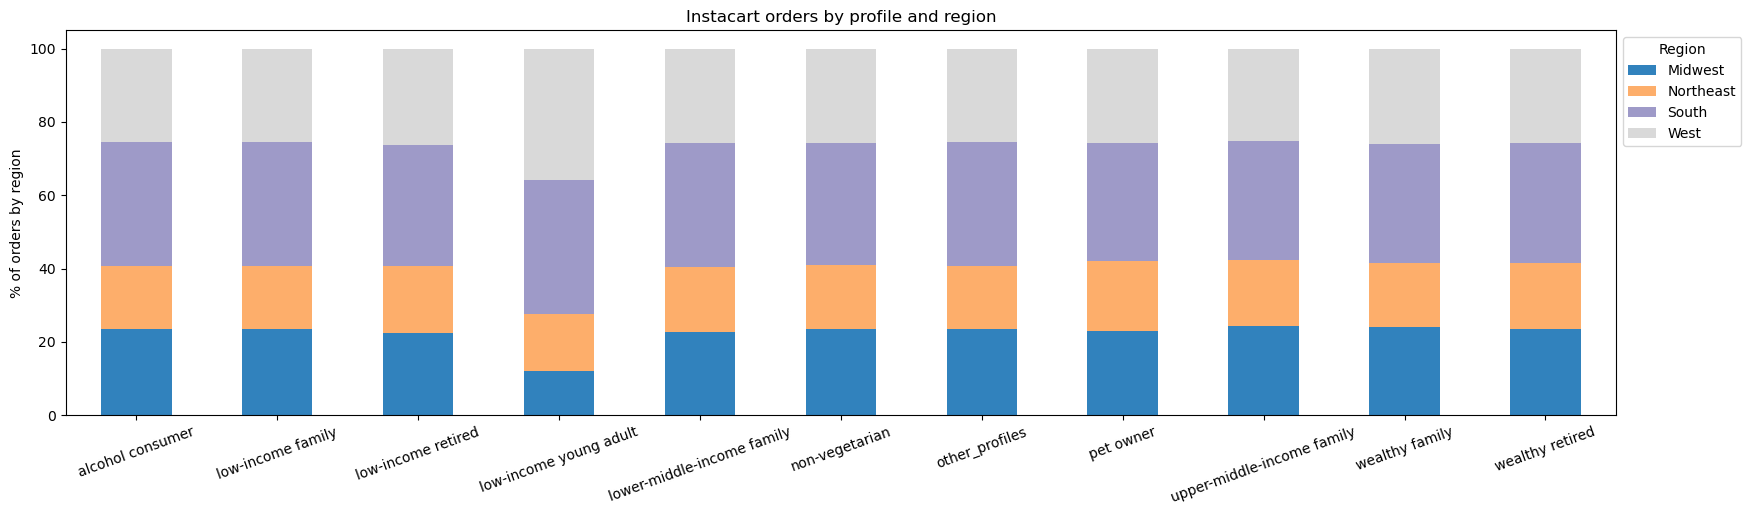

In [98]:
# Create a stacked bar graph to plot profile for regions
bar_profile_region = crosstab_profile.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=20, figsize=(20,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")

In [99]:
# Exporting the profile-region bar chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Instacart orders by department')

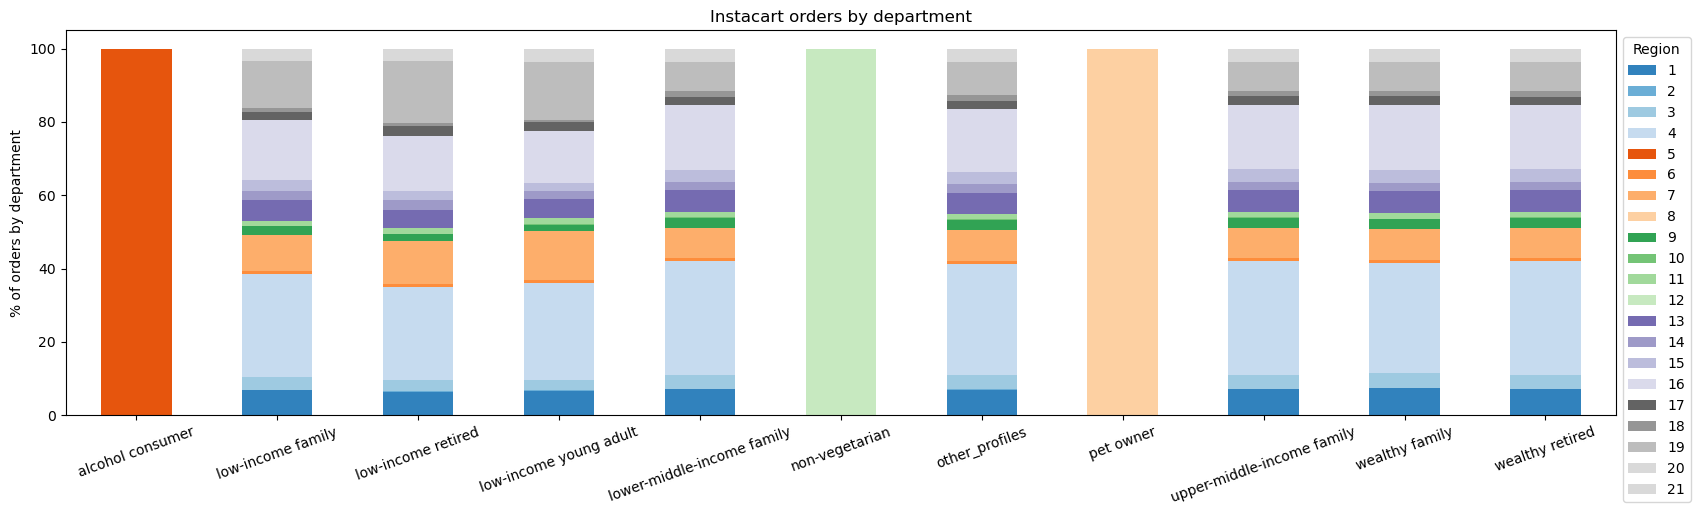

In [100]:
# Create a stacked bar graph to plot profile for departments
bar_dep_region = crosstab_department.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=20, figsize=(20,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by department")
plt.title ("Instacart orders by department")

In [101]:
# Exporting the department region bar chart
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_profiles_barchart.png'), bbox_inches = 'tight')

In [102]:
# Creating a crosstab to compare different orders by region and average order
crosstab_ord_region1 = pd.crosstab(df_all['region'], df_all['average_order_flag'], dropna = False)

In [103]:
crosstab_ord_region1

average_order_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


Text(0.5, 1.0, 'IC orders by region according to average order')

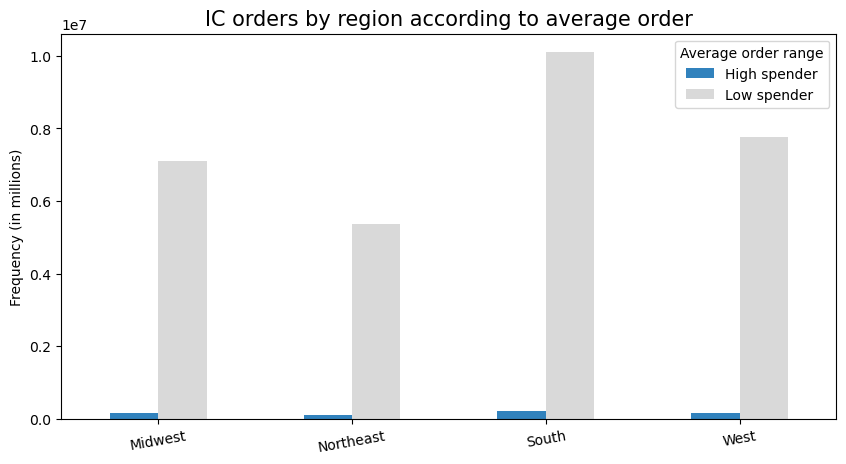

In [104]:
# Create a bar chart to show the result
barchart_price_region1=crosstab_ord_region1.plot.bar(rot=10, figsize=(10,5), colormap='tab20c').legend(title="Average order range")
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC orders by region according to average order", fontsize = '15')

In [105]:
# Creating a crosstab to compare different orders by region and loyalty
crosstab_loyalty = pd.crosstab(df_all['region'], df_all['loyalty_flag'], dropna = False)

In [106]:
crosstab_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 1.0, 'IC orders by region and loyalty')

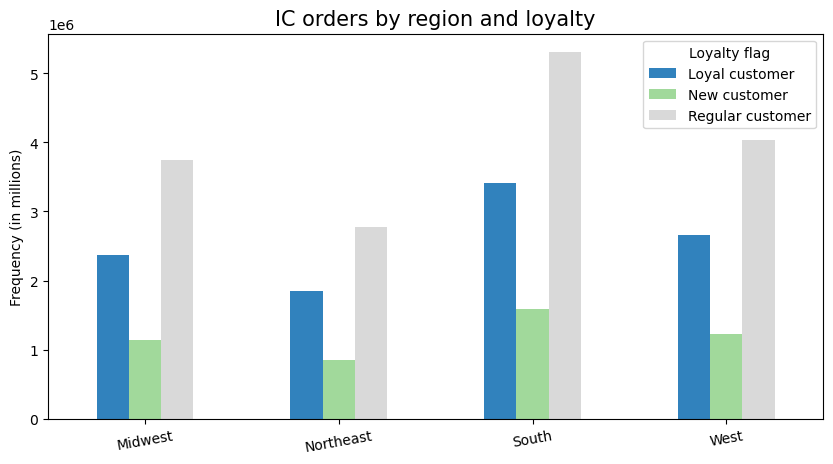

In [107]:
# Create a bar chart to show the result
barchart_loyalty=crosstab_loyalty.plot.bar(rot=10, figsize=(10,5), colormap='tab20c').legend(title="Loyalty flag")
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC orders by region and loyalty", fontsize = '15')

In [108]:
# Creating a crosstab to compare different orders by region and income
crosstab_income = pd.crosstab(df_all['region'], df_all['income_flag'], dropna = False)

In [109]:
crosstab_income

income_flag,High income,Low income,Lower Middle income,Upper Middle income
region,,,,
Midwest,917495,1638866,2222554,2482598
Northeast,677730,1247015,1701186,1838754
South,1290460,2392126,3255068,3373485
West,1009590,1829332,2471015,2617290


Text(0.5, 1.0, 'IC orders by region and income')

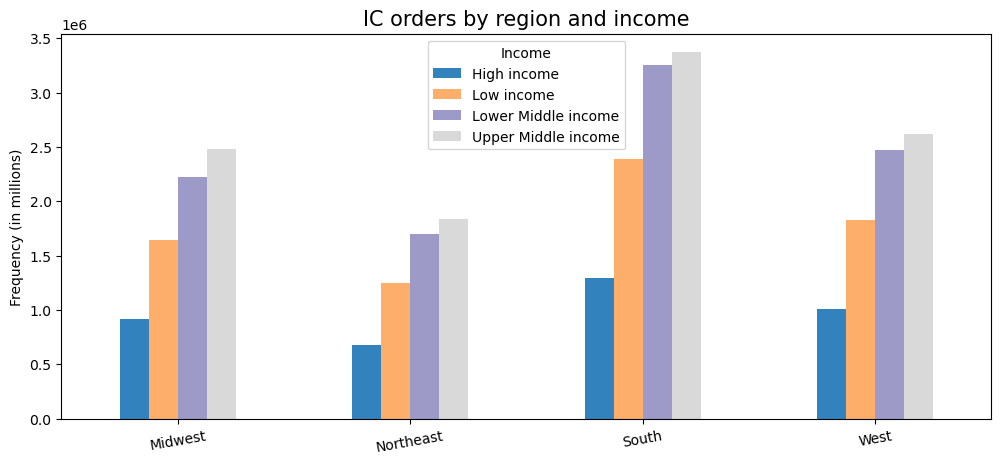

In [110]:
# Create a bar chart to show the result
barchart_income=crosstab_income.plot.bar(rot=10, figsize=(12,5), colormap='tab20c').legend(title="Income")
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC orders by region and income", fontsize = '15')

In [111]:
# Creating a crosstab to show the loyalty according to 
crosstab_dept= pd.crosstab(df_all['department_id'], df_all['age_flag'], dropna = False)

In [112]:
crosstab_dept

age_flag,Adult,Middle aged,Senior,Young adult
department_id,,,,
1,656244,667149,564250,201204
2,10731,10811,8946,3348
3,350445,350804,295997,105975
4,2840988,2830853,2408104,860551
5,43878,46579,36693,14418
6,80439,79743,67199,24461
7,793938,814687,684020,241114
8,28348,28293,25115,10291
9,256165,256920,217316,78524


Text(0.5, 1.0, 'IC orders by department and age')

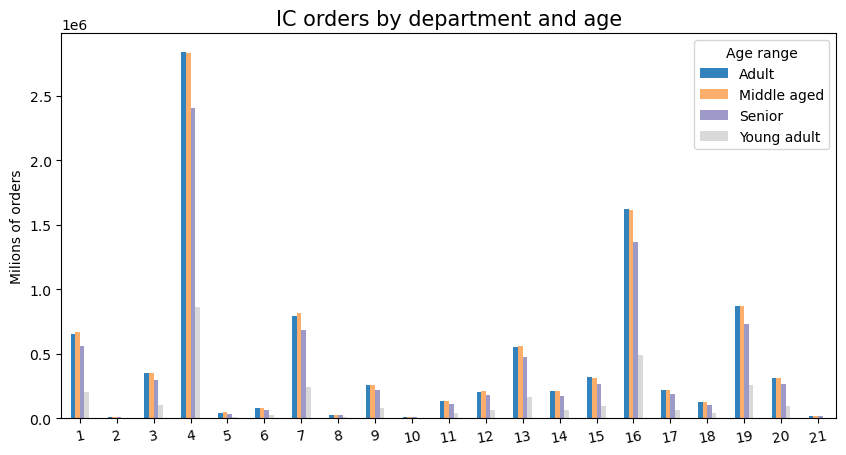

In [113]:
# Create a bar chart to show the result
barchart_age_dept=crosstab_dept.plot.bar(rot=10, figsize=(10,5), colormap='tab20c').legend(title="Age range")
plt.xlabel("")
plt.ylabel("Milions of orders")
plt.title("IC orders by department and age", fontsize = '15')

In [114]:
# Creating a crosstab to show the orders by department and order habits
crosstab_ordertime= pd.crosstab(df_all['department_id'], df_all['order_time'], dropna = False)

In [115]:
crosstab_ordertime

order_time,Early bird,Night owl,Regular customer
department_id,,,
1,314664,109497,1697570
2,5437,1739,27235
3,190359,52456,878013
4,1528725,487212,7063336
5,17543,3756,123328
6,38263,13573,204155
7,435124,118203,2018574
8,13722,4453,74885
9,127516,41966,652654


Text(0.5, 1.0, 'IC orders by department and order time habits')

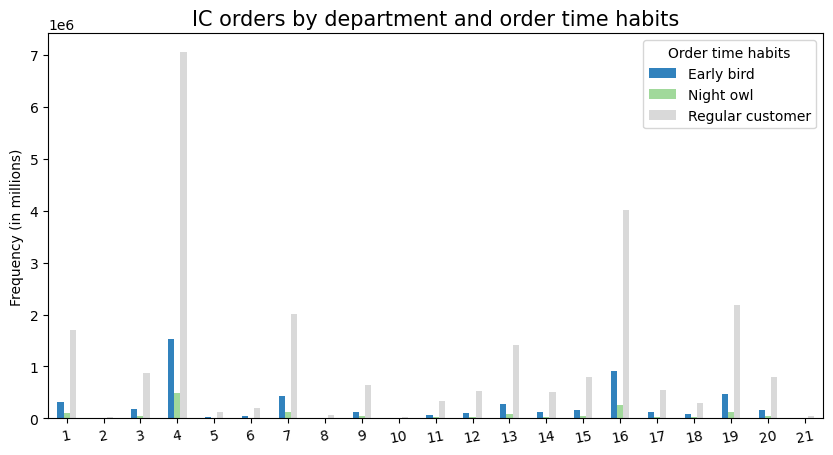

In [116]:
# Create a bar chart to show the result
barchart_habit_dept=crosstab_ordertime.plot.bar(rot=10, figsize=(10,5), colormap='tab20c').legend(title="Order time habits")
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC orders by department and order time habits", fontsize = '15')

According to the above visualization, alcohol is the most popular product that is purchased throughout the day (10 a.m. - 22 p.m.)

In [117]:
# Creating a crosstab to show the loyalty according to family composition
crosstab_family_loyalty= pd.crosstab(df_all['family_flag'], df_all['loyalty_flag'], dropna = False)

In [118]:
crosstab_family_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
family_flag,,,
Big family,2582679,1196502,3993335
No kids,2588844,1201265,3949572
Small family,5112570,2405928,7933869


Text(0.5, 1.0, 'IC customers loyalty according to family composition')

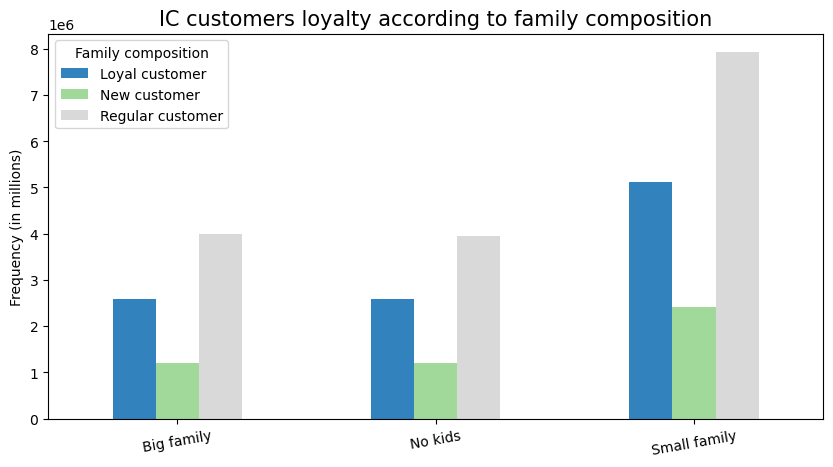

In [119]:
# Create a bar chart to show the result
barchart_family_loyalty=crosstab_family_loyalty.plot.bar(rot=10, figsize=(10,5), colormap='tab20c').legend(title="Family composition")
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title("IC customers loyalty according to family composition", fontsize = '15')

Text(0.5, 1.0, 'Product prices on Instacart')

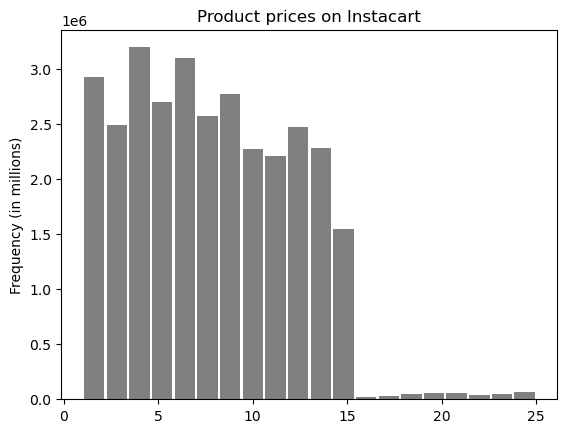

In [120]:
# Creating a histogram with the product prices
hist_price_frequency =df_all['prices'].plot.hist(bins = 20, color = 'gray', rwidth = 0.9)
plt.xlabel("")
plt.ylabel("Frequency (in millions)")
plt.title ("Product prices on Instacart")

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
The various client profiles often don't show any clear tendency. The South States have the highest concentrations of loyal, high spenders as well as wealthy clients. Alcohol is the item that customers order from IC the most. Moreover, the most popular goods purchased cost less than $15. We can tailor promotions and marketing campaigns with the use of this data.

# 9. Export dataset and visualizations

In [121]:
# Export data to pkl
df_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_complete.pkl'))

In [122]:
barchart_price_region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_price_region1.png'))

In [123]:
barchart_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_loyalty.png'))

In [124]:
barchart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_income.png'))

In [125]:
barchart_habit_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_habit_dept.png'))

In [126]:
barchart_family_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_family_loyalty.png'))

In [127]:
hist_price_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','hist_price_frequency.png'))